# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 05/02/2023
* Student Name: Wilmer Maldonado
* Student Net ID: etc7fq
* This URL: https://github.com/Wilmer-Maldonado/Monte-Carlo/blob/main/FinalProjectV1.ipynb
* GitHub Repo URL: https://github.com/Wilmer-Maldonado/Monte-Carlo

# The Monte Carlo Module

In [2]:
# A code block with your classes.
#contains all classes in MonteCarlo module

import pandas as pd
import numpy as np

class Die:
    '''
    PURPOSE: Given an array of faces, creates a Die class object.
    Die class object contains the Die's faces and corresponding weights.
    Also, can random sample from the vector of faces according to weights,
    to simulate rolling of die, and returns each roll's outcomes in list.
    
    INPUT
    array    array of faces
    
    OUTPUT
    Die      Die class object
    '''
    def __init__(self, array) :
        '''
        PURPOSE: Creates instance of Die object, by receiving argument of array of Die's faces.
        Weights of faces internally initializes as 1.0 for each face.
        Stores both faces and weights into a Private Dataframe, to be used in other methods.

        INPUT- arguments for method
        array      array of faces   

        OUTPUT- outputs and attributes
        self.__faces_weights <- private attribute/dataframe with Die object's faces and weights
                                to be used in other Die class methods.
        '''
        weights = np.array([1.0 for elem in array])
        self.__faces_weights = pd.DataFrame({'faces': array , 'weights': weights})
    
    def change_wt(self, face, new_weight):
        '''
        PURPOSE: Given face in instantiated Die object and desired weight for face,
        updates Die's dataframe for faces and weights accordingly.

        INPUT- arguments for method
        face <- face in instantiated Die object
        new_weight <- desired new weight for face in argument
           

        OUTPUT- outputs and attributes
        face Argument Error message <- if face passed not in Die's array of faces/weights,
                                       returns "Face entered not in Die!"
        
        new_weight Argument Error message <- if new_weight passed is not a float and cannot be converted to float, 
                                             returns "New Weight is not float, and can't be converted to float"
                                       
        self.__faces_weights <- private attribute/dataframe updated with new_weight for face argument
        '''
        try:
            assert face in list(self.__faces_weights['faces'][:]), "Face entered not in Die!"
            type(float(new_weight))== float
            self.__faces_weights.loc[self.__faces_weights['faces'] == face, 'weights'] = float(new_weight)
        except AssertionError as e:
            print(e)
        except ValueError:
            print("New Weight is not float, and can't be converted to float")
            
    def roll_die(self, num_rolls=1):
        '''
        PURPOSE: Given number of rolls, returns outcome of each roll in list.
                 Roll is simulated by random sample of face vector according to weights.
                 Does not internally store results.

        INPUT- arguments for method
        num_rolls <- number of rolls, defaults to number of rolls = 1
           
        OUTPUT- outputs and attributes
        allrolls <- face outcome of each roll in list
        '''
        allfaces = self.__faces_weights['faces']
        allweights = self.__faces_weights['weights']
        allrolls = []
        while num_rolls>0:
            allrolls.append(list(allfaces.sample(weights = allweights))[0])
            num_rolls+=-1
        return allrolls
    
    def current_die(self):
        '''
        PURPOSE: Method returns Die class object's most current dataframe of faces and associated weights.

        INPUT- self argument only, ex. die_object.current_die()

        OUTPUT- outputs and attributes
        self.__faces_weights <- returns current private attribute/dataframe,
                                if applicable with updates made by change_wt method.
        '''
        return self.__faces_weights


class Game:
    '''
    PURPOSE: Given a list of already instantiated similar Die objects 
    (similar means same number of sides and associated faces), 
    returns Game class object. Each Die object may have different weights.
    Die class object contains the Die's faces and corresponding weights.
    Also, can random sample from each die's vector of faces according to weights,
    to simulate rolling od dice. Stores most recent results of play.
    
    INPUT
    die_list    list of already instantiated similar Die objects.
    
    OUTPUT
    Game        Game class object
    '''
    def __init__(self, die_list):
        '''
        PURPOSE: Creates instance of Game class object, given list of already instantiated similar Die objects. 

        INPUT- arguments for method
        die_list <- list of already instantiated similar Die objects
           
        OUTPUT- outputs and attributes
        self.__dice <- private attribute containing list of Die objects.
                       Used in other methods for Game class.
        '''
        self.__dice = die_list#assumes argument is list of Die objects
    
    def play(self, total_rolls=1):
        '''
        PURPOSE: Stores face outcome of all dice for each roll in private dataframe, 
                 given number of total desired rolls. Dataframe has shape N rolls by M dice.
                 

        INPUT- arguments for method
        total_rolls <- defaults to 1, total rolls desired for play event with Dice in Game class object.
           
        OUTPUT- outputs and attributes
        self.__results <- private dataframe with play event results,
                          contains columns for roll number and die number, with corresponding face rolled as values. 
                          shape N rolls by M dice.
        '''
        results = pd.DataFrame(index=range(1, total_rolls+1), 
                          columns=[i for i in range(0, len(self.__dice))])
        results.index.name = 'roll_number'
        for i, die in enumerate(self.__dice):
            results[i] = die.roll_die(total_rolls)
        self.__results = results
    
    def show(self, form = 'wide'):
        '''
        PURPOSE: Displays dataframe containing results of most recent play.
                 Format of play results dataframe depends on parameter value of 'wide' or 'narrow'.

        INPUT- arguments for method
        form <- can be 'narrow' or 'wide to designate desired format of most recent play results.
                defaults as 'wide'.
                
        OUTPUT- outputs and attributes
        'narrow' form play results dataframe <- two column index with roll number and die number, and a column for face rolled
        
        'wide' form play results dataframe <- single column index with roll number, and each die number as a column
        '''
        try:
            assert form == 'wide' or form == 'narrow', "Invalid option, pass 'wide' or 'narrow' as argument!"
            if form == 'wide':
                return self.__results
            else:
                narrow = self.__results.reset_index()
                narrow1 = narrow.melt(id_vars='roll_number', var_name='die_number', value_name='face_rolled').set_index('roll_number')
                narrow2 = narrow1.set_index('die_number', append=True)
                return narrow2
        except AssertionError as e:
            print(e)


class Analyzer:
    '''
    PURPOSE: Given a single Game class object, computes various
    descriptive statistical properties about it.
    
    INPUT
    game_obj      Game class object    
    
    OUTPUT
    Analyzer      Analyzer class object
    '''
    def __init__(self, game_obj):
        '''
        PURPOSE: Creates instance of Analyzer class object, given instantiated Game class object. 

        INPUT- arguments for method
        game_obj <- instantiated Game class object
           
        OUTPUT- outputs and attributes
        self.__game <- private attribute containing argument of instantiated Game class object.
                       Used in other methods for Analyzer class.
        '''
        self.__game= game_obj
    
    def jackpot(self):
        '''
        PURPOSE: computes how many times the game resulted in all faces being identical. 

        INPUT- self argument only, ex. game_object.jackpot()
           
        OUTPUT- outputs and attributes
        self.jackpot_df <- public attribute stores rolls in game which resulted in all identical faces.
                           roll number as named index.
        
        len(self.jackpot_df) <- how many times a roll in a game resulted in identical faces,
                                computed by getting number of rolls in self.jackpot_df using len()
        '''
        wide_results=self.__game.show().copy(deep=True)
        jackpot_filter = wide_results.apply(lambda row: row.nunique() == 1, axis=1)
        self.jackpot_df = wide_results[jackpot_filter]
        return len(self.jackpot_df)
                
    def combo(self):
        '''
        PURPOSE: Given instantiated game class object, 
                 computes the distinct combinations of faces rolled, along with their counts. 

        INPUT- self argument only, ex. game_object.combo()
           
        OUTPUT- outputs and attributes
        self.combo_df <- public attribute containing dataframe,
                         with distinct combinations of faces rolled in game as a multi-columned index.
                         And a column containing counts of each combination.
        '''
        intial_df = self.__game.show().copy(deep=True)
        df2 = intial_df.apply(lambda x: tuple(sorted(tuple(x))), axis=1)
        #returns series so converted back to dataframe below
        df3 = pd.DataFrame({'roll_number':df2.index, 'combinations':df2.values}).set_index('roll_number')
        #getting counts
        freq = df3.apply(lambda x: tuple(x), axis=1).value_counts()
        df3['counts'] = df3.apply(lambda x: freq[tuple(x)], axis=1)
        #dropping extras now that counts has been made
        df3 = df3.drop_duplicates()
        #making tuples index instead of roll_number
        df3 = df3.set_index('combinations')
        # Index column combination tuples into MultiIndex
        new_index = pd.MultiIndex.from_tuples(df3.index)
        # Set multiindex as new index
        df3.index = new_index
        #get number of levels
        num_levels = df3.index.nlevels
        # sort multi index based on c=index column 0,1,2
        df3 = df3.sort_index(level=[x for x in range(0, num_levels)])
        self.combo_df = df3
        
    def face_counts_per_roll(self):
        '''
        PURPOSE: computes how many times a given face is rolled in each game event. 

        INPUT- self argument only, ex. game_object.face_counts_per_roll()
           
        OUTPUT- outputs and attributes
        self.face_counts_df <- public attribute storing dataframe displaying counts 
                               of each face for each roll in a game event.
                               Index of roll number and face values as columns(i.e. it is 'wide' form)
        '''
        show_results= self.__game.show().copy(deep=True)
        face_counts_df=show_results.apply(pd.Series.value_counts, axis=1)
        self.face_counts_df=face_counts_df.fillna(0)

# Test Module

In [3]:
import unittest

class MonteCarloTestSuite(unittest.TestCase):
    '''
        PURPOSE: Tests each method in each class to validate methods receive correct inputs and return valid outputs.
                 Tests build on each other, Die objects used for Game object, and Game object used for Analyzer class.
                 This validates all classes are working properly and not erroring upon use of classes and attributes.
    '''
    #DIE CLASS TESTS
    def test_1_change_wt(self):
        '''
        PURPOSE: Test 1 change_wt method, verifying only a incorrect entry message is outputted
                 but test does not raise an Error. Incorrect entry message occurs,
                 when face passed is not in Die object dataframe's faces column.
                 
                 Incorrect entry message: "Face entered not in Die!"
        '''
        # Create Die instance
        global six_sided
        six_sided=Die(np.array(["one", "two", "three", "four", "five", "six"]))
        six_sided.change_wt("eight", 1.0)
        self.assertTrue("eight" not in six_sided.current_die()['faces'][:])
        
    def test_2_change_wt(self):
        '''
        PURPOSE: Test 2 change_wt method, verifying only a incorrect entry message is outputted,
                 but test does not raise an Error. Incorrect entry message occurs
                 when new_weight passed is not float, and cannot be converted to float.
                 
                 Incorrect entry message: "New Weight is not float, and can't be converted to float"
        '''
        # uses six_sided Die object.
        err_output2 = six_sided.change_wt("four", 'x')
        #Test-check new weight, 'x', passed cannot be converted to float
        #err_output2 should match message in expected variable
        self.assertTrue("x" not in six_sided.current_die()['weights'][:])
    
    def test_3_change_wt(self):
        '''
        PURPOSE: Test 3 change_wt method, verifying when change_wt method is called,
                 dataframe containing face and weights updated accordingly.
        '''
        # uses six_sided Die object
        six_sided.change_wt("one", "3")
        six_sided.change_wt("three", 4)
        six_sided.change_wt("six", 2.7)
        #checks weight column to see if changes were made accordingly
        #unchanged weights remain 1.0, changed weights from above reflected in list as floats
        expected = [3.0,1.0,4.0,1.0,1.0,2.7]
        self.assertEqual(list(six_sided.current_die()['weights']), expected)
        
    def test_4_roll_die(self):
        '''
        PURPOSE: Test 4 roll_die method, verifies there is an outcome for each roll in list,
                 when roll_die method is used. Matches list length of outcomes with num_rolls argument.
        '''
        # uses six_sided Die object
        list_roll_outcomes = six_sided.roll_die(10)
        #Test-check length of outputted list from roll_die method matches argument # of rolls
        self.assertTrue(len(list_roll_outcomes)==10)
        
    def test_5_current_die(self):
        '''
        PURPOSE: Test 5 current_die method, verifying updated dataframe of Die object containing faces and weights,
                 has updated weights after change_wt method used in test_3_change_wt.
        '''
        # uses six_sided Die object
        output_die_df = six_sided.current_die()
        #made expected df of six_sided object
        expected = pd.DataFrame({'faces': np.array(["one", "two", "three", "four", "five", "six"]) , 
                                 'weights': np.array([3.0,1.0,4.0,1.0,1.0,2.7])})
        # Test-check if expected df matches df output when current_die method is called
        self.assertTrue((list(output_die_df['faces']) == list(expected['faces'])) &
                       (list(output_die_df['weights']) == list(expected['weights'])))
    #GAME CLASS TESTS
    def test_6_play(self):
        '''
        PURPOSE: Test 6 play method, verifying list of Die objects can be passed to game class.
                 And play method results dataframe's shape matches expected shape of N rolls by M dice.
        '''
        #all_six_sided is list of already instantiated similar Die objects
        six_sided1=Die(np.array(["one", "two", "three", "four", "five", "six"]))
        six_sided2=Die(np.array(["one", "two", "three", "four", "five", "six"]))
        six_sided3=Die(np.array(["one", "two", "three", "four", "five", "six"]))
        all_six_sided=[six_sided1, six_sided2, six_sided3]
        #game1 is Game class object
        global game_1
        game_1 = Game(all_six_sided)
        rolls_play=20
        game_1.play(rolls_play)
        #to verify play method must call show method since play method has no public attribute for play results
        #show method by default contains results from play 
        #and Test-check shape of play results to see if it matches 20 rolls by 3 Die objects as expected
        #will test play() further using show method with 'wide' argument in next test
        #since show('wide') contains public attribute directly displaying play() df stored in private attribute
        expected = game_1.show().shape
        self.assertEqual((rolls_play, len(all_six_sided)), expected)
        
    def test_7_show(self):
        '''
        PURPOSE: Test 7 show method, verifies structure is correct for resulting dataframe of play results.
                 Specifically, index_name is only roll_number for 'wide' form.
        '''
        #game1 is class object
        play_results_wide_df = game_1.show('wide')
        #test-check if index name is roll_number
        self.assertTrue(play_results_wide_df.index.name == 'roll_number')
        
    def test_8_show(self):
        '''
        PURPOSE: Test 8 show method, verifies structure is correct for resulting dataframe of play results.
                 Specifically, if 'narrow' form has roll_number and die_number as two-columned index.
        '''
        #game1 is class object
        play_results_narrow_df = game_1.show('narrow')
        #test-check if index name is roll_number and die_number for narrow format
        self.assertTrue(play_results_narrow_df.index.names == ['roll_number', 'die_number'])
    
    def test_9_show(self):
        '''
        PURPOSE: Test 9 show method, verifies structure is correct for resulting dataframe of play results.
                 Specifically, shape matches expected for narrow format two column index.
                 number of rows is equal to number of rolls times number of die.
                 only 'face_rolled' is a column, roll number and die number are indexes and not included in shape
        '''
        #game1 is class object
        play_results_narrow_df = game_1.show('narrow')
        #test-check shape matches expected for narrow format
        #two column index, do not count as columns when calling df.shape, so only 'face_rolled' is a column
        #number of rows is equal to 20 rolls times 3 die so 60 rows in narrow format for game1 object
        self.assertTrue(play_results_narrow_df.shape == (60,1))
        
    def test_10_jackpot(self):
        '''
        PURPOSE: Test 10 jackpot method, verifies Analyzer class can take game object as argument.
                 test also checks return from jackpot method is integer, 
                 representing number of times a roll resulted in all dice having same face outcome.
        '''
        #Analyzer class takes game1 Game class object from previous tests as argument
        global analyzer1
        analyzer1 = Analyzer(game_1)
        #Test checks if return from jackpot method is integer
        self.assertTrue(type(analyzer1.jackpot()) == int)
    
    def test_11_jackpot(self):
        '''
        PURPOSE: Test 11 jackpot method, verifies public attribute jackpot_df can be called and has correct structure.
                 Specifically, roll_number is index.      
        '''
        #analyzer1 as Analyzer class object
        #checks dataframe for public attribute self.jackpot_df is indexed by roll_number
        #if calling index.names works then public attribute .jackpot_df output is also valid data frame
        self.assertTrue(analyzer1.jackpot_df.index.name == 'roll_number')
        
    def test_12_combo(self):
        '''
        PURPOSE: Test 12 combo method, verifies combo method can be called and creates public attribute .combo_df.
                 .combo_df should have multi-columned index and  test verifies one column for count. 
        '''
        #calling analyzer method combo
        analyzer1.combo()
        #Test checks only if public attribute .combo_df is valid
        #and if number of columns is 1, for count
        #all other columns should be index columns, so are not counted in .columns
        self.assertTrue(len(list(analyzer1.combo_df.columns)) == 1 )
        
    def test_13_face_counts_per_roll(self):
        '''
        PURPOSE: Test 13 face_counts_per_roll method, verifies face_counts_per_roll can be called
                 and shape of resulting dataframe stored in public attribute .face_counts_df matches expected.
                 Specifically, shape should be N rolls by M faces.      
        '''
        #calls face_counts_per_roll method under Analyzer class
        analyzer1.face_counts_per_roll()
        #each die of same kind have 6 faces, so shape should be 20 rolls, by 6 faces
        expected_shape = (20, 6)
        #if test passes below, it is also valid that face_counts_df is a public attribute
        self.assertEqual(analyzer1.face_counts_df.shape, expected_shape)
        
        
if __name__ == '__main__':
    suite = unittest.TestSuite()
    suite.addTest(MonteCarloTestSuite('test_1_change_wt'))
    suite.addTest(MonteCarloTestSuite('test_2_change_wt'))
    suite.addTest(MonteCarloTestSuite('test_3_change_wt'))
    suite.addTest(MonteCarloTestSuite('test_4_roll_die'))
    suite.addTest(MonteCarloTestSuite('test_5_current_die'))
    suite.addTest(MonteCarloTestSuite('test_6_play'))
    suite.addTest(MonteCarloTestSuite('test_7_show'))
    suite.addTest(MonteCarloTestSuite('test_8_show'))
    suite.addTest(MonteCarloTestSuite('test_9_show'))
    suite.addTest(MonteCarloTestSuite('test_10_jackpot'))
    suite.addTest(MonteCarloTestSuite('test_11_jackpot'))
    suite.addTest(MonteCarloTestSuite('test_12_combo'))
    suite.addTest(MonteCarloTestSuite('test_13_face_counts_per_roll'))
    unittest.TextTestRunner(verbosity=3).run(suite)

test_1_change_wt (__main__.MonteCarloTestSuite)
PURPOSE: Test 1 change_wt method, verifying only a incorrect entry message is outputted ... ok
test_2_change_wt (__main__.MonteCarloTestSuite)
PURPOSE: Test 2 change_wt method, verifying only a incorrect entry message is outputted, ... ok
test_3_change_wt (__main__.MonteCarloTestSuite)
PURPOSE: Test 3 change_wt method, verifying when change_wt method is called, ... ok
test_4_roll_die (__main__.MonteCarloTestSuite)
PURPOSE: Test 4 roll_die method, verifies there is an outcome for each roll in list, ... ok
test_5_current_die (__main__.MonteCarloTestSuite)
PURPOSE: Test 5 current_die method, verifying updated dataframe of Die object containing faces and weights, ... ok
test_6_play (__main__.MonteCarloTestSuite)
PURPOSE: Test 6 play method, verifying list of Die objects can be passed to game class. ... ok
test_7_show (__main__.MonteCarloTestSuite)
PURPOSE: Test 7 show method, verifies structure is correct for resulting dataframe of play resul

Face entered not in Die!
New Weight is not float, and can't be converted to float


ok

----------------------------------------------------------------------
Ran 13 tests in 0.122s

OK


# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [3]:
# Code blocks with output Scenario 1
import pandas as pd
import numpy as np
from MonteCarlo import Die

#1. Create a fair coin (with faces H and T) and one unfair coin, in
#which one of the faces has a weight of 5 and the others 1.

fair_coin = Die(np.array(["H", "T"]))
unfair_coin = Die(np.array(["H", "T"]))

unfair_coin.change_wt("T", 5.0)

print("fair coin faces and weights df:\n", fair_coin.current_die())

print("\nunfair coin faces and weights df:\n", unfair_coin.current_die())

fair coin faces and weights df:
   faces  weights
0     H      1.0
1     T      1.0

unfair coin faces and weights df:
   faces  weights
0     H      1.0
1     T      5.0


In [4]:
from MonteCarlo import Game
#2.Play a game of 1000 flips with all fair dice.
fair_coin1 = Die(np.array(["H", "T"]))
fair_coin2 = Die(np.array(["H", "T"]))
fair_coin3 = Die(np.array(["H", "T"]))

all_fair_dice = [fair_coin1, fair_coin2, fair_coin3]
fair_game = Game(all_fair_dice)

fair_game.play(1000)

In [5]:
#3.Play a game of 1000 flips with two unfair dice and one fair die.
unfair_coin1 = Die(np.array(["H", "T"]))
unfair_coin2 = Die(np.array(["H", "T"]))
fair_coin4 = Die(np.array(["H", "T"]))

unfair_coin1.change_wt("T", 5.0)
unfair_coin2.change_wt("T", 5.0)

unfair2_fair1_dice = [unfair_coin1, unfair_coin2, fair_coin4]
unfair2_fair1_game = Game(unfair2_fair1_dice)

unfair2_fair1_game.play(1000)

In [6]:
from MonteCarlo import Analyzer
#4.For each game, use an Analyzer object to determine the
#relative frequency of jackpots – getting either all Hs or all Ts.

fair_game_stats = Analyzer(fair_game)
unfair2_fair1_game_stats = Analyzer(unfair2_fair1_game)

print("Fair Dice - Frequency of jackpots: ", fair_game_stats.jackpot())
print("\nUnfair2 Fair1 Dice - Frequency of jackpots: ", unfair2_fair1_game_stats.jackpot())

Fair Dice - Frequency of jackpots:  259

Unfair2 Fair1 Dice - Frequency of jackpots:  346


In [7]:
#5.Compute relative frequency as the number of jackpots over the
#total number of rolls.

fair_game_jp_relativefreq = fair_game_stats.jackpot()/1000
unfair2_fair1_game_jp_relativefreq = unfair2_fair1_game_stats.jackpot()/1000

print("Fair Dice - Relative Frequency of jackpots: ", fair_game_jp_relativefreq)
print("\nUnfair2 Fair1 Dice - Relative Frequency of jackpots: ", unfair2_fair1_game_jp_relativefreq)

Fair Dice - Relative Frequency of jackpots:  0.259

Unfair2 Fair1 Dice - Relative Frequency of jackpots:  0.346


<AxesSubplot:title={'center':'Barchart of Relative Frequency of Jackpots Across Games'}, ylabel='Relative Frequency of Jackpot'>

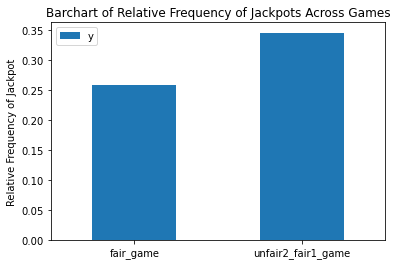

In [8]:
#6. Show your results, comparing the two relative frequencies, in a simple bar chart
df = pd.DataFrame({
    'x': ['fair_game', 'unfair2_fair1_game'],
    'y': [fair_game_jp_relativefreq, unfair2_fair1_game_jp_relativefreq]
})

# Plot the bar chart
df.plot(kind='bar', x='x', y='y', rot=0, xlabel='', ylabel='Relative Frequency of Jackpot',
        title = 'Barchart of Relative Frequency of Jackpots Across Games')

## Scenario 2

In [10]:
# Code blocks with output for Scenario 2

#1.Create a fair die and two unfair dice, all of six sides with the
#faces 1 through 6. One unfair die (Type 1) will weight 6 five
#times more than the others (i.e. it has weight of 5 and the
#others a weight of 1 each). The other unfair die (Type 2)
#will weight 1 five times more than the others.

fair_die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die2 = Die(np.array([1, 2, 3, 4, 5, 6]))

#Type 1 die with face 6 weight five times more than other faces
unfair_die1.change_wt(6, 5.0)

#Type 2 die with face 1 weight five times more than other faces
unfair_die2.change_wt(1, 5.0)

In [14]:
#2.Play a game of 10000 rolls with 5 fair dice.

fair5_dice = [fair_die1, fair_die1, fair_die1, fair_die1, fair_die1]
fair5_game = Game(fair5_dice)

fair5_game.play(10000)

In [15]:
#3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair
#die of type 2, and the rest fair dice.

mixed5_dice = [unfair_die1, unfair_die1, unfair_die2, fair_die1, fair_die1]
mixed5_game = Game(mixed5_dice)

mixed5_game.play(10000)

Fair 5 dice game - jackpot relative freq:  0.0008

Mixed 5 dice game - jackpot relative freq:  0.0011 



<AxesSubplot:title={'center':'Barchart of Relative Frequency of Jackpots By Game'}, ylabel='Relative Frequency of Jackpots'>

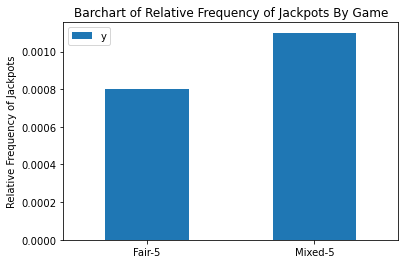

In [20]:
#4. For each game, use an Analyzer object to determine the
#relative frequency of jackpots and show your results,
#comparing the two relative frequencies, in a simple bar chart.

fair5_game_stats = Analyzer(fair5_game)
mixed5_game_stats = Analyzer(mixed5_game)

fair5_jp_relativefreq = fair5_game_stats.jackpot()/10000
mixed5_jp_relativefreq = mixed5_game_stats.jackpot()/10000

print("Fair 5 dice game - jackpot relative freq: ", fair5_jp_relativefreq)
print("\nMixed 5 dice game - jackpot relative freq: ", mixed5_jp_relativefreq, "\n")


df = pd.DataFrame({
    'x':['Fair-5', 'Mixed-5'],
    'y':[fair5_jp_relativefreq, mixed5_jp_relativefreq]
})

df.plot(kind='bar', x='x', y='y', rot=0, xlabel='', ylabel = 'Relative Frequency of Jackpots',
       title= 'Barchart of Relative Frequency of Jackpots By Game')


<AxesSubplot:title={'center':'Mixed fairness - 5 dice game top ten most frequent combinations'}, xlabel='Combinations', ylabel='counts'>

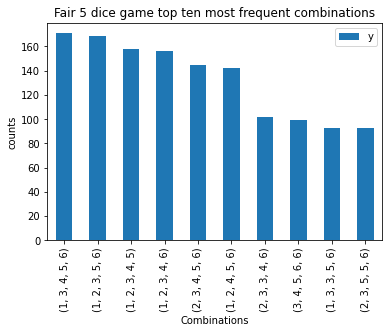

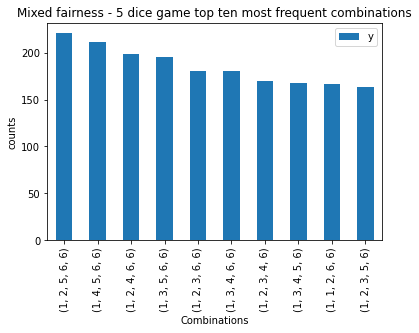

In [30]:
#5. Also compute 10 most frequent combinations of faces for each
#game. Plot each of these as bar charts.

fair5_game_stats.combo()
mixed5_game_stats.combo()
#sorts .combo_df by counts, and gives stores top ten rows for each game
fair5_combos_df = fair5_game_stats.combo_df.sort_values(by='counts', ascending = False).head(10)
mixed5_combos_df = mixed5_game_stats.combo_df.sort_values(by='counts', ascending = False).head(10)

#converts multi-columned index to tuples in list for each game
#will use for new dfs for barcharts
top10combos_fair5 = fair5_combos_df.index.tolist()
top10combos_mixed5 = mixed5_combos_df.index.tolist()

df1=pd.DataFrame({
    'x':top10combos_fair5,
    'y':list(fair5_combos_df['counts'])
})

df1.plot(kind='bar', x='x', y='y', xlabel='Combinations', ylabel='counts', rot=90,
        title = 'Fair 5 dice game top ten most frequent combinations')

df2=pd.DataFrame({
    'x':top10combos_mixed5,
    'y':list(mixed5_combos_df['counts'])
})



df2.plot(kind='bar', x='x', y='y', xlabel='Combinations', ylabel='counts', rot=90,
        title = 'Mixed fairness - 5 dice game top ten most frequent combinations')

## Scenario 3

In [31]:
# Code blocks with output for Scenario 3

#1. Create a "die" of letters from a to z with weights based on their
#frequency of usage.


letter_die = Die(np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 
                           'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
                           'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                           'Y', 'Z']
))


letter_die.change_wt('A', 8.4966)
letter_die.change_wt('B', 2.0720)
letter_die.change_wt('C', 4.5388)
letter_die.change_wt('D', 3.3844)
letter_die.change_wt('E', 11.1607)
letter_die.change_wt('F', 1.8121)
letter_die.change_wt('G', 2.4705)
letter_die.change_wt('H', 3.0034)
letter_die.change_wt('I', 7.5448)
letter_die.change_wt('J', 0.1965)
letter_die.change_wt('K', 1.1016)
letter_die.change_wt('L', 5.4893)
letter_die.change_wt('M', 3.0129)
letter_die.change_wt('N', 6.6544)
letter_die.change_wt('O', 7.1635)
letter_die.change_wt('P', 3.1671)
letter_die.change_wt('Q', 0.1962)
letter_die.change_wt('R', 7.5809)
letter_die.change_wt('S', 5.7351)
letter_die.change_wt('T', 6.9509)
letter_die.change_wt('U', 3.6308)
letter_die.change_wt('V', 1.0074)
letter_die.change_wt('W', 1.2899)
letter_die.change_wt('X', 0.2902)
letter_die.change_wt('Y', 1.7779)
letter_die.change_wt('Z', 0.2722)


In [43]:
letter_die_list = [letter_die, letter_die, letter_die, letter_die, letter_die]
letter_game = Game(letter_die_list)

letter_game.play(1000)

In [44]:
letter_game.show()

,0,1,2,3,4
roll_number,,,,,
1,L,M,E,E,A
2,W,F,M,I,A
3,E,O,S,T,R
4,I,R,O,U,L
5,T,S,B,T,O
...,...,...,...,...,...
996,E,O,R,I,E
997,I,R,O,T,A
998,T,N,L,E,E


In [54]:
#3. How many combos can you identify that look like actual English
#words? NOTE: "combo" here just means resulting sequence,
#not literally combination as opposed to permutation.

#Found three combos that look like actual English Words.

#roll_number 306, 422, and 918
print("Word made by letter combo at roll_number 306: ", list(letter_game.show().loc[306]),
      "\nWord made by letter combo at roll_number 422: ", list(letter_game.show().loc[422]),
      "\nWord made by letter combo at roll_number 918: ", list(letter_game.show().loc[918]))

Word made by letter combo at roll_number 306:  ['R', 'O', 'A', 'R', 'S'] 
Word made by letter combo at roll_number 422:  ['W', 'A', 'C', 'K', 'Y'] 
Word made by letter combo at roll_number 918:  ['G', 'R', 'O', 'S', 'S']


In [55]:
#4. Based on your eye count, what is the relative frequency of
#these words versus the rest?
print('Relative frequency of English Word Rolled in Game object-5 letter die, play-1000 rolls: ',3/1000 )

Relative frequency of English Word Rolled in Game object-5 letter die, play-1000 rolls:  0.003


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [60]:
#directory of repo before installing module MonteCarlo
!cd Monte-Carlo/;ls -lRF -o

.:
total 16
-rw-r--r-- 1 etc7fq 1073 May  2 03:23 LICENSE
drwxr-sr-x 4 etc7fq 3584 May  2 06:07 MonteCarlo/
-rw-r--r-- 1 etc7fq  802 May  1 15:05 montecarlo_test_results.txt
-rw-r--r-- 1 etc7fq   44 May  2 03:23 README.md

./MonteCarlo:
total 64
-rw-r--r-- 1 etc7fq    39 May  2 03:20 __init__.py
-rw-r--r-- 1 etc7fq 11151 May  2 01:49 MonteCarlo.py
-rw-r--r-- 1 etc7fq 13329 May  2 02:48 MonteCarlo.pyc
-rw-r--r-- 1 etc7fq 10299 May  2 06:07 montecarlo_tester.py
drwxr-sr-x 2 etc7fq  2048 May  2 03:41 __pycache__/
-rw-r--r-- 1 etc7fq   375 May  2 02:56 setup.py

./MonteCarlo/__pycache__:
total 40
-rw-r--r-- 1 etc7fq  2307 May  1 12:56 Analyzer.cpython-38.pyc
-rw-r--r-- 1 etc7fq  1604 Apr 30 22:36 Die.cpython-38.pyc
-rw-r--r-- 1 etc7fq  1538 Apr 30 23:25 Game.cpython-38.pyc
-rw-r--r-- 1 etc7fq 12122 May  2 03:41 MonteCarlo.cpython-38.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [66]:
#verifying in Monte-Carlo repo
import os
os.chdir('/sfs/qumulo/qhome/etc7fq/documents/MSDS/DS5100/Monte-Carlo')

In [65]:
# Installation commands
#install package with pip
!cd MonteCarlo/; pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/etc7fq/documents/MSDS/DS5100/Monte-Carlo/MonteCarlo
  Running setup.py develop for MonteCarlo
